In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython import display
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


In [3]:
dataset = pd.read_csv("/Users/sumedha/Desktop/iris.csv")
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values


In [6]:
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.

    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform

    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [10]:
def pca_results(full_dataset, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)




`3.` Fit PCA to reduce the current dimensionality of the datset to 3 dimensions.  You can use the helper functions, or perform the steps on your own.  If you fit on your own, be sure to standardize your data.  At the end of this process, you will want an **X** matrix with the reduced dimensionality to only 3 features.  Additionally, you will want your **pca** object back that has been used to fit and transform your dataset. 

In [11]:
pca, X_pca = do_pca(3, dataset)

`4.` Once you have your pca object, you can take a closer look at what comprises each of the principal components.  Use the **pca_results** function from the **helper_functions** module assist with taking a closer look at the results of your analysis.  The function takes two arguments: the full dataset and the pca object you created.

,Explained Variance,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Dimension 1,0.7659,0.4456,-0.2286,0.5066,0.4974,0.4952
Dimension 2,0.1843,0.3780,0.9227,0.0264,0.0701,-0.0117
Dimension 3,0.0373,-0.7521,0.2853,-0.0291,0.3866,0.4501


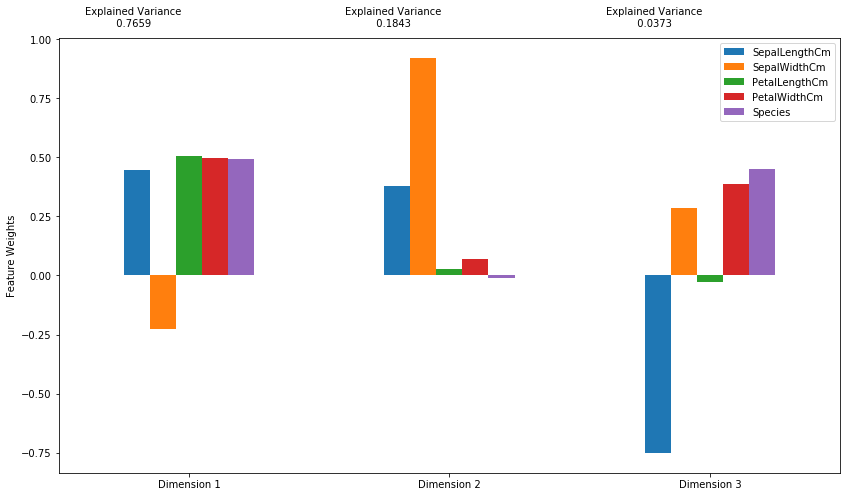

In [12]:
pca_results(dataset, pca)

`6.` How many components need to be kept to explain at least 85% of the variability in the original dataset?  When you think you have the answer, store it in the variable `num_comps`.  Then run the following cell to see if your solution matches ours!

Using 2 components, we can explain 0.9502% of the variability in the original data.


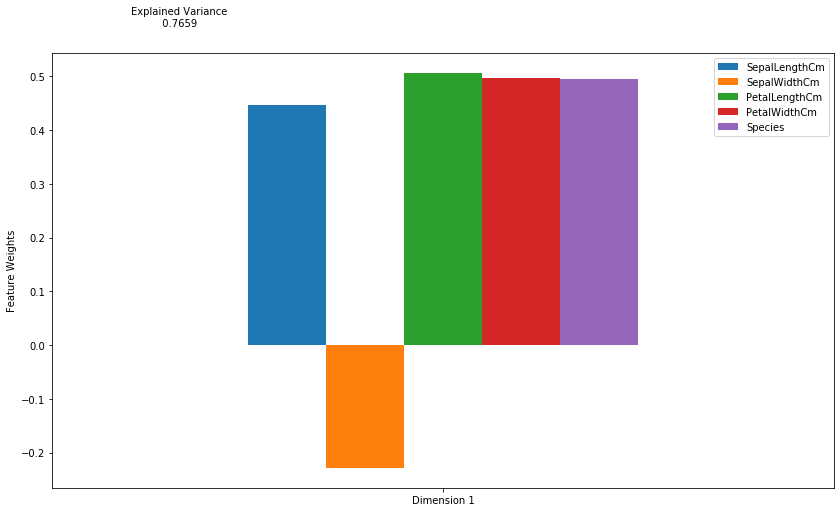

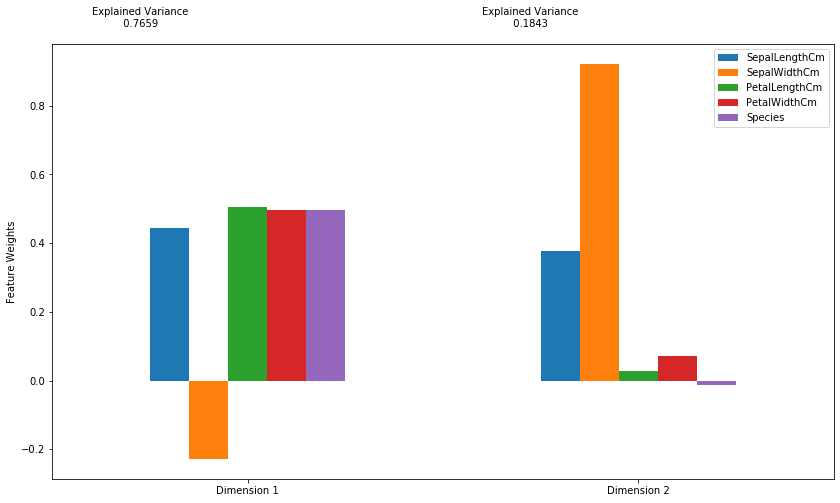

In [14]:
for comp in range(1, dataset.shape[1]):
    pca, X_pca = do_pca(comp, dataset)
    comp_check = pca_results(dataset, pca)
    if comp_check['Explained Variance'].sum() > 0.85:
        break
        

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(comp_check.shape[0],comp_check['Explained Variance'].sum()))